In [14]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [15]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_woods

maze = gym.make('Woods1-v0')
print("This is how maze looks like")
situation = maze.reset()
print(type(situation))
print(situation)
maze.render()


This is how maze looks like
<class 'list'>
['.', '.', '.', '.', '.', '.', '.', 'O']

□ □ □ X □
□ □ □ □ □
■ ■ $ □ □
■ ■ ■ □ □
■ ■ ■ □ □


In [16]:
from lcs.agents.xncs import Configuration
from utils.nxcs_utils import *

cfg = Configuration(number_of_actions=8,
                    user_metrics_collector_fcn=xncs_metrics,
                    metrics_trial_frequency=10,
                    max_population=1000,
                    )



In [17]:


number_of_experiments = 2
explore = 0
exploit = 2500

df = avg_experiment(
    maze=maze,
    cfg=cfg,
    number_of_tests=number_of_experiments,
    explore_trials=explore,
    exploit_trials=exploit,
    pre_generate=True
    )




Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 15, 'reward': 1000.0, 'perf_time': 0.1265051999998832, 'numerosity': 1000, 'population': 806, 'average_specificity': 60.11, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 4, 'reward': 1000.0000092886122, 'perf_time': 0.025052799999912168, 'numerosity': 1000, 'population': 692, 'average_specificity': 70.576, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 50, 'reward': 1.8142877965529527e-12, 'perf_time': 0.28711920000000646, 'numerosity': 1000, 'population': 682, 'average_specificity': 56.262, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 750, 'steps_in_trial': 50, 'reward': 3.655253076036953e-05, 'perf_time': 0.29238710000004176, 'numerosity': 1000, 'population': 633, 'average_specificity': 55.454, 'fraction_accuracy': 0.009540117416829745}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 50, 'reward': 1.5562945950803363e-79, 'perf_time': 0.2397419

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 12, 'reward': 1000.0, 'perf_time': 0.1048000000000684, 'numerosity': 1000, 'population': 808, 'average_specificity': 63.404, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 4, 'reward': 1271.4399322294107, 'perf_time': 0.018099200000051496, 'numerosity': 1000, 'population': 701, 'average_specificity': 52.824, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 4, 'reward': 1278.2960306875025, 'perf_time': 0.017446099999915532, 'numerosity': 1000, 'population': 675, 'average_specificity': 47.536, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 750, 'steps_in_trial': 7, 'reward': 1091.6214180314962, 'perf_time': 0.03658799999993789, 'numerosity': 1000, 'population': 636, 'average_specificity': 45.459, 'fraction_accuracy': 0.0}
INFO:lcs.agents.Agent:{'trial': 1000, 'steps_in_trial': 5, 'reward': 1219.35614631337, 'perf_time': 0.021666899999900124, 'numerosity': 1000

In [18]:
display(df)

,steps_in_trial,reward,perf_time,numerosity,population,average_specificity,fraction_accuracy
trial,,,,,,,
0,13.5,1.000000e+03,0.115653,1000.0,807.0,61.757,0.0
10,26.0,7.520500e+02,0.175509,1000.0,791.0,60.261,0.0
20,50.0,6.680437e-13,0.306126,1000.0,772.5,58.846,0.0
30,50.0,1.827626e-05,0.285788,1000.0,771.5,58.108,0.0
40,50.0,1.827626e-05,0.311911,1000.0,768.5,58.681,0.0
...,...,...,...,...,...,...,...
2450,3.5,1.360962e+03,0.015389,1000.0,608.0,34.806,0.0
2460,8.5,1.297603e+03,0.039121,1000.0,611.5,34.482,0.0
2470,7.5,1.094273e+03,0.037157,1000.0,609.5,34.444,0.0


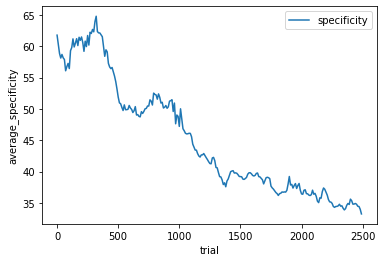

In [19]:
import pandas as pd
import numpy as np

ax = df['average_specificity'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("average_specificity")
ax.legend(["specificity"])


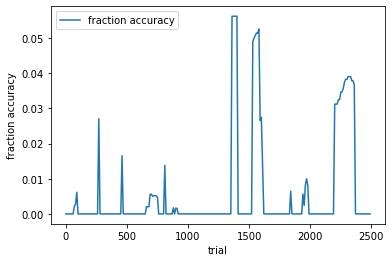

In [20]:
ax = df['fraction_accuracy'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("fraction accuracy")
ax.legend(["fraction accuracy"])

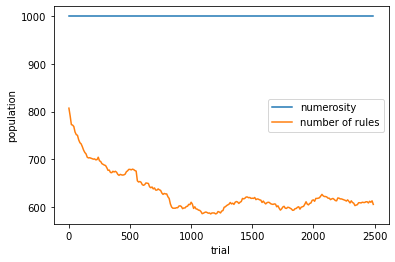

In [21]:
ax = df[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

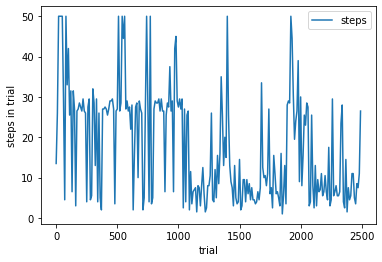

In [22]:
ax = df['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])